# Forecasting the Sales of a Furniture store
We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [87]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
import os
from dateutil.parser import parse

In [88]:
os.getcwd()

'C:\\Users\\Admin\\3D Objects\\imarticus PGDA\\Machine learning\\Time Series\\Furniture Sales'

<a id='load_data'></a>
# 2. Load Data


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Load the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
furniture = pd.read_csv("Super_Store.csv",sep=",", encoding='cp1252')
print(furniture.shape)
furniture.head()

(2121, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [90]:
os.getcwd()

'C:\\Users\\Admin\\3D Objects\\imarticus PGDA\\Machine learning\\Time Series\\Furniture Sales'

In [91]:
df = furniture.copy(deep=True)

In [92]:
furniture.shape

(2121, 21)

<a id='data_preparation'></a>
# 3. Data Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Converting date into standard format<br> 
                        4. Check for missing values<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [93]:
# Checking structure of the data
furniture.shape

(2121, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [94]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


<a id='check_data_type'></a>
## 3.3 Checking for Missing Values 

In [95]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Checking the stock time stamp

In [96]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [97]:
furniture['Order Date'].value_counts().sort_index()

1/1/2017     4
1/10/2014    1
1/10/2015    1
1/10/2016    2
1/11/2014    1
            ..
9/8/2016     6
9/8/2017     3
9/9/2014     3
9/9/2016     1
9/9/2017     5
Name: Order Date, Length: 889, dtype: int64

We remove the columns that we do not need as well as check missing values

In [98]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')


Checking for null values

In [99]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [100]:
len(df.loc[:,'Order Date'].unique())

889

In [101]:
df.loc[:, 'Order Date'].value_counts().sort_index()

1/1/2017     4
1/10/2014    1
1/10/2015    1
1/10/2016    2
1/11/2014    1
            ..
9/8/2016     6
9/8/2017     3
9/9/2014     3
9/9/2016     1
9/9/2017     5
Name: Order Date, Length: 889, dtype: int64

In [102]:
df.loc[df.loc[:,'Order Date'] == '2017-12-29', ['Order Date', 'Sales']]

,Order Date,Sales


<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There are no missing values<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Indexing_with_Date'></a>
## 3.5 Indexing with Date

Aggregate price by date

In [103]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
len(furniture)

889

In [104]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [105]:
furniture.head().sort_index()

,Sales
Order Date,
2014-01-10,51.940
2014-01-11,9.940
2015-01-10,1018.104
2016-01-10,104.770
2017-01-01,975.490


In [106]:
furniture.tail().sort_index()

,Sales
Order Date,
2014-09-09,864.0240
2016-09-08,3374.9816
2016-09-09,15.0080
2017-09-08,1000.2390
2017-09-09,482.5640


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we analysis Time series data to do so we need to perform following steps <br><br>
                        1. Visualizing Data <br>
                        2. Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

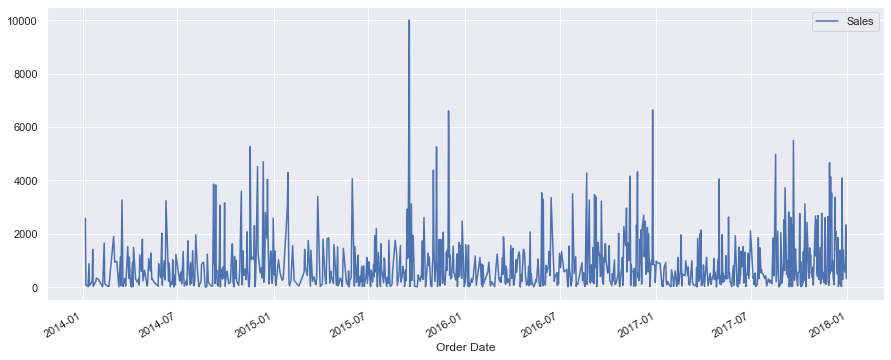

In [108]:
furniture.plot(figsize=(15, 6))
plt.show()

In [109]:
furniture.index.year, furniture.index.month

(Int64Index([2017, 2014, 2015, 2016, 2014, 2016, 2017, 2014, 2015, 2017,
             ...
             2014, 2015, 2017, 2014, 2015, 2016, 2017, 2014, 2016, 2017],
            dtype='int64', name='Order Date', length=889),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
            dtype='int64', name='Order Date', length=889))

In [110]:
furniture.groupby([furniture.index.year, furniture.index.month])['Sales'].mean()

Order Date  Order Date
2014        1              480.194231
            2              367.931600
            3              857.291529
            4              567.488357
            5              432.049188
            6              695.059242
            7              601.169500
            8              457.521656
            9              992.353367
            10             769.015437
            11             980.221486
            12            1532.298325
2015        1              978.328467
            2              522.395667
            3              781.236437
            4              805.822962
            5              624.996700
            6              428.565500
            7              719.706316
            8              602.412012
            9             1382.790684
            10             632.980184
            11            1286.701354
            12            1049.355418
2016        1              508.182867
            2              

In [111]:
df_copy = furniture.copy(deep=True)

In [112]:
df_copy['year'] = df_copy.index.year
df_copy['month'] = df_copy.index.month

In [113]:
df_copy.head()

,Sales,year,month
Order Date,,,
2017-01-01,975.490,2017,1
2014-01-10,51.940,2014,1
2015-01-10,1018.104,2015,1
2016-01-10,104.770,2016,1
2014-01-11,9.940,2014,1


In [114]:
## The monthly resample can also be done manually by creating year and month columns
## from date index and the we use these year and month columns to get the same monthly
## average value.
df_copy.groupby(['year', 'month'])['Sales'].mean()

year  month
2014  1         480.194231
      2         367.931600
      3         857.291529
      4         567.488357
      5         432.049188
      6         695.059242
      7         601.169500
      8         457.521656
      9         992.353367
      10        769.015437
      11        980.221486
      12       1532.298325
2015  1         978.328467
      2         522.395667
      3         781.236437
      4         805.822962
      5         624.996700
      6         428.565500
      7         719.706316
      8         602.412012
      9        1382.790684
      10        632.980184
      11       1286.701354
      12       1049.355418
2016  1         508.182867
      2         356.868273
      3         609.575810
      4         695.373158
      5         687.265227
      6         816.910750
      7         768.736412
      8         734.307782
      9        1135.953371
      10        624.872474
      11       1271.345152
      12       1410.719808
2017  1         

<a id='Sampling'></a>
## 4.2 Sampling

In [115]:
y = furniture['Sales'].resample('MS').mean()

In [117]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

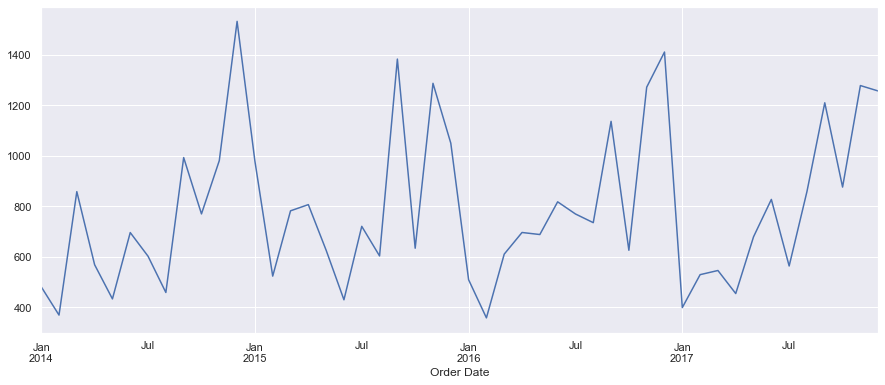

In [86]:
y.plot(figsize=(15, 6))
plt.show()

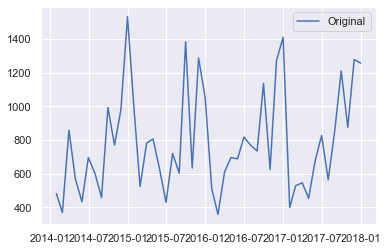

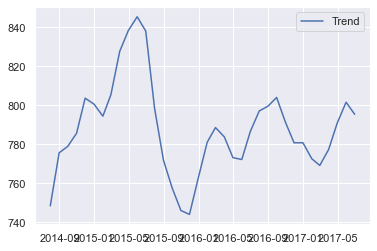

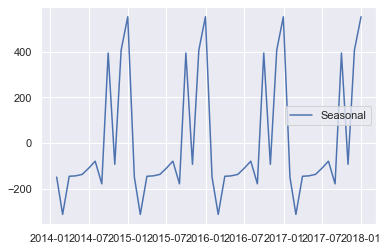

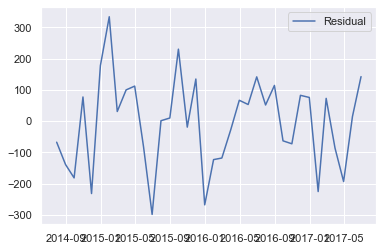

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity

### ADF Test


Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We can see that our statistic value of -4.756843 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



### KPSS Test

**Null Hypothesis: The series has no  unit root ( stationary)**

**Alternate Hypothesis: The series has no unit root (not stationary)**

In [23]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import kpss
print('Results of KPSS Test:')
kpsstest = kpss(y, regression='c', nlags=1)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print(kpss_output)

Results of KPSS Test:
Test Statistic           0.215132
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<a id='Decomposing'></a>
## 4.4 Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

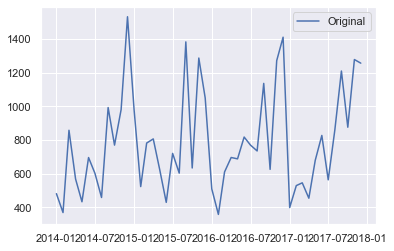

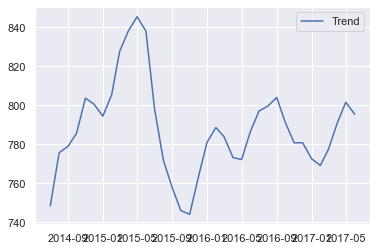

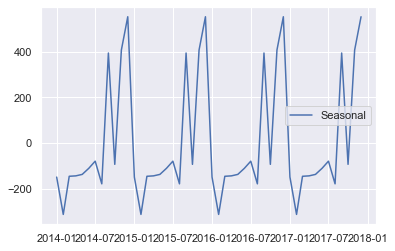

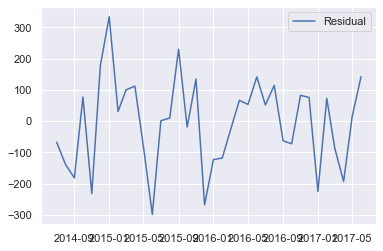

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [87]:
p = d = q = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [57]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [51]:
list(p), d, q

([0, 1], range(0, 2), range(0, 2))

<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
result_dict = {}
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                        seasonal_order=param_seasonal,
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1374.2942560689369
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793683
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:977.4114391755996
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2613.406405126096
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673276


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5228339304702
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2440.0997862338
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946866
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764357354
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.8112674437089
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269463


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167961
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1325.8976991150942
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151484
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816732


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2023.5282991417089
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484829773
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233403544
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427394
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2440.716600586667


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417335
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612373
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1402.0758375032106
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160944
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935203


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1174.6261016070855
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084619
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143805
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185906


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2403.8269376526514
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958158263
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965908
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238773184
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2334.0894916948073


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002137865
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881245653
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1373.6940736819536


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190993
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658786006
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1428.9896695327855
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345395
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.326499250675
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835552
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:355.7040777815686


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876096973
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069393665
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608864
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1998.3304762952805


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439541878
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661038664475


In [90]:
print(sorted(result_dict.keys()))
result_dict[280]

[280.0, 281.0, 282.0, 283.0, 292.0, 293.0, 294.0, 298.0, 300.0, 301.0, 302.0, 304.0, 305.0, 306.0, 307.0, 311.0, 318.0, 320.0, 356.0, 459.0, 460.0, 467.0, 468.0, 470.0, 475.0, 478.0, 479.0, 481.0, 483.0, 486.0, 487.0, 497.0, 498.0, 500.0, 649.0, 650.0, 666.0, 671.0, 678.0, 692.0, 721.0, 769.0, 977.0, 1175.0, 1198.0, 1326.0, 1374.0, 1402.0, 1429.0, 1998.0, 2024.0, 2334.0, 2404.0, 2440.0, 2441.0, 2613.0]


'(0, 1, 1)(0, 1, 1, 12)'

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We are selecting those parameter which has minimum AIC score</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the ARIMA model

In [96]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3197.336     -0.000      1.000   -6267.663    6265.663
ar.S.L12       0.0274      0.512      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3196.993     -0.000      1.000   -6266.992    6264.991
sigma2      2.715e+04      0.050   5.38e+05      0.000    2.71e+04    2.71e+04


**Running model diagnostiscs to check any unusual behaviour**
<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


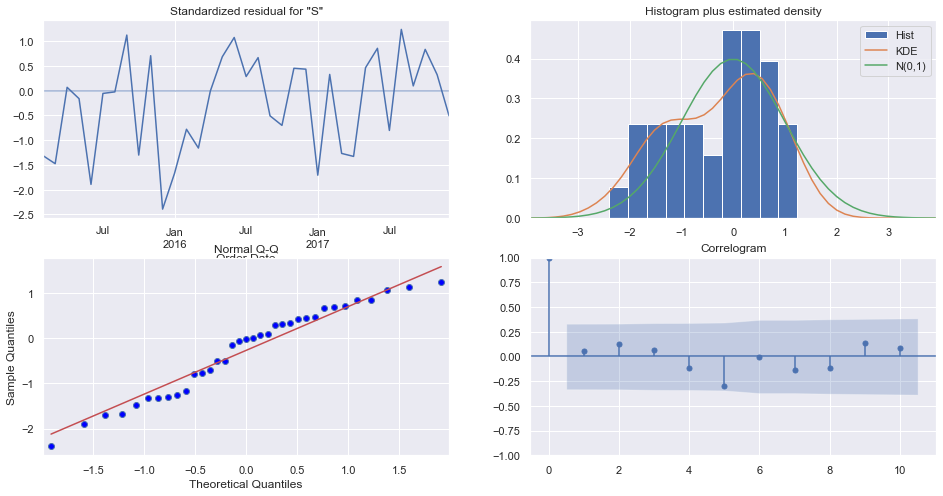

In [92]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The model diagnostics indicates that the model residuals are near normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
y.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


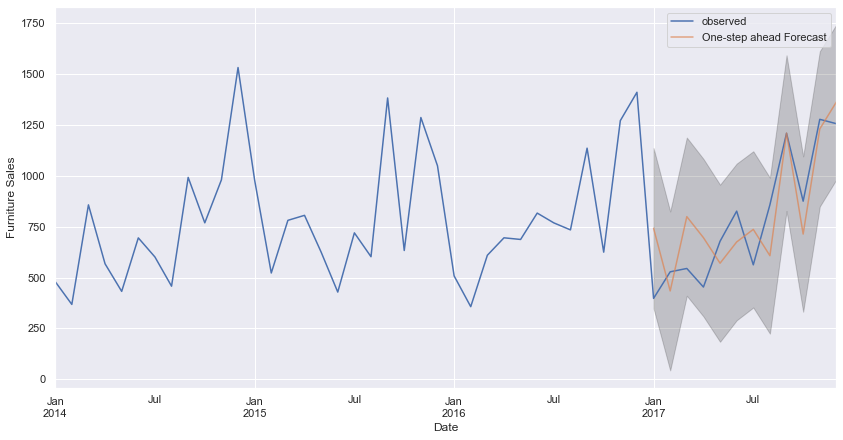

In [97]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE


In [98]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34904.03
The Root Mean Squared Error of our forecasts is 186.83


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 160.34 of the real sales..</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


            lower Sales  upper Sales
2018-01-01   250.479989  1000.538581
2018-02-01   116.186268   872.709995
2018-03-01   359.961522  1116.864802
2018-04-01   291.950001  1048.885184
2018-05-01   275.399690  1032.337681
2018-06-01   363.459519  1120.397761
2018-07-01   327.346803  1084.285089
2018-08-01   338.748709  1095.687181
2018-09-01   842.470298  1599.410429
2018-10-01   403.477208  1160.432253
2018-11-01   869.496959  1626.582484
2018-12-01   964.042828  1721.830974
2019-01-01   260.071021  1052.380010


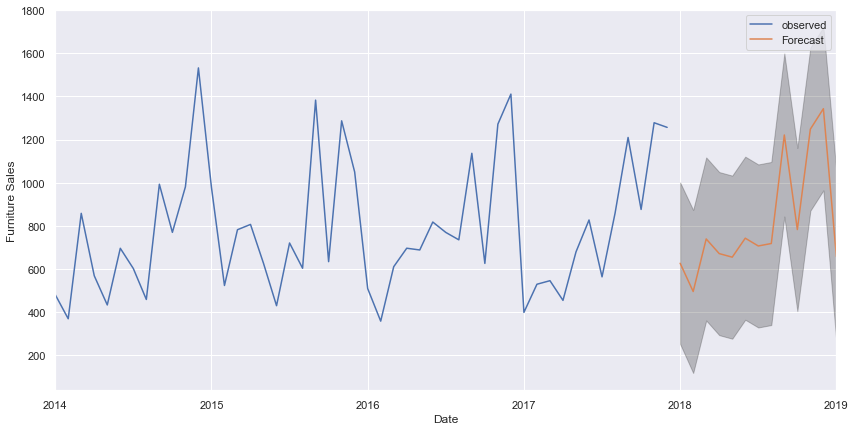

In [99]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

<a id="Conclusion"> </a>
# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.

In [102]:
from sklearn.metrics import r2_score
r2_score(y_forecasted,  y_truth)

0.5509023942566598

In [103]:
len(y)

48

In [111]:
y_weekly = furniture.resample('W').sum().round(0).astype(int)

In [112]:
y_weekly.sort_index()

,Sales
Order Date,
2014-01-12,2712
2014-01-19,1250
2014-01-26,1656
2014-02-02,624
2014-02-09,15
...,...
2017-12-03,16008
2017-12-10,8794
2017-12-17,4640
